**Modelos de Regresión Personalizados**

Diseñar y optimizar modelos de regresión mediante la búsqueda sistemática de hiperparámetros. Se debe incluir un análisis de residuos y gráficos de dispersión que comparen los valores reales con las predicciones. Justificar las decisiones tomadas en la configuración de los hiperparámetros con base en analisis coherentes de los datos.

In [ ]:
%run './02-analisis-calidad-datos-cashrequest.ipynb'
df_cashrequest = df_cashrequest.copy()  # Guardar el primer df

In [70]:
#%run './02-analisis-calidad-datos-fees.ipynb'
df_fees = pd.read_csv('./fees-new.csv')  # Guardar el segundo df

In [71]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21061 non-null  int64  
 1   cash_request_id       21057 non-null  float64
 2   type                  21061 non-null  object 
 3   status                21061 non-null  object 
 4   category              21061 non-null  object 
 5   total_amount          21061 non-null  float64
 6   reason                21061 non-null  object 
 7   created_at            21061 non-null  object 
 8   updated_at            21061 non-null  object 
 9   paid_at               21061 non-null  object 
 10  from_date             21061 non-null  object 
 11  to_date               21061 non-null  object 
 12  charge_moment         21061 non-null  object 
 13  cohort                21061 non-null  object 
 14  duration_days         21061 non-null  int64  
 15  valid_dates        

In [47]:
import sklearn.model_selection as train_test_split
import sklearn.svm as svm

In [72]:
df_cashrequest['reimbursement_month'] = df_cashrequest['reimbursement_date'].dt.month
df_cashrequest['created_at_month'] = df_cashrequest['created_at'].dt.month
df_cashrequest['updated_at_month'] = df_cashrequest['updated_at'].dt.month


In [73]:
df_cashrequest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

In [74]:
# Crear df numérico
# Seleccionar las columnas numericas
numeric_columns = df_cashrequest.select_dtypes(include=['int64', 'float64']).columns

# Crear un nuevo dataframe
cashrequest_numeric = df_cashrequest[numeric_columns]

In [75]:
cashrequest_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23970 non-null  int64  
 1   amount                   23970 non-null  float64
 2   user_id                  21867 non-null  float64
 3   deleted_account_id       2104 non-null   float64
 4   time_to_update           23970 non-null  float64
 5   recovery_status_encoded  23970 non-null  int64  
 6   transfer_type_encoded    23970 non-null  int64  
 7   status_encoded           23970 non-null  int64  
 8   payment_issue_encoded    23970 non-null  int64  
 9   reimbursement_month      3050 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [76]:
# Crear df numérico
# Seleccionar las columnas numericas
numeric_columns = df_fees.select_dtypes(include=['int64', 'float64']).columns

# Crear nuevo dataframe
fees_numeric = df_fees[numeric_columns]

In [77]:
fees_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21061 non-null  int64  
 1   cash_request_id       21057 non-null  float64
 2   total_amount          21061 non-null  float64
 3   duration_days         21061 non-null  int64  
 4   time_to_payment_days  21061 non-null  int64  
 5   reason_id             21061 non-null  int64  
 6   type_encoded          21061 non-null  int64  
 7   status_encoded        21061 non-null  int64  
 8   category_encoded      21061 non-null  int64  
 9   reason_encoded        20464 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


**Procesamiento de los datos para realizar PCA y K-means**

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Rellenar valores nulos con la media
imputer = SimpleImputer(strategy='mean')
fees_cleaned = imputer.fit_transform(fees_numeric)
cashrequest_cleaned = imputer.fit_transform(cashrequest_numeric)

# Escalar los datos
scaler = StandardScaler()
fees_scaled = scaler.fit_transform(fees_cleaned)
cashrequest_scaled = scaler.fit_transform(cashrequest_cleaned)


**PCA**

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca_fees = PCA(n_components=3)
fees_pca = pca_fees.fit_transform(fees_scaled)

# Display explained variance and components matrix
print("Explained Variance Ratio:", pca_fees.explained_variance_ratio_)

components_matrix_fees = pd.DataFrame(
    pca_fees.components_,
    columns=fees_numeric.columns,
    index=[f"PC{i+1}" for i in range(3)]
)

print("PCA Components Matrix:")
print(components_matrix_fees)

Explained Variance Ratio: [0.35906395 0.2253723  0.1429984 ]
PCA Components Matrix:
           id  cash_request_id  total_amount  duration_days  \
PC1  0.399230         0.481907      0.005397      -0.083369   
PC2 -0.221823        -0.159217      0.001563       0.552915   
PC3  0.187904         0.225778      0.003874       0.395607   

     time_to_payment_days  reason_id  type_encoded  status_encoded  \
PC1             -0.069323   0.445170     -0.410140       -0.235973   
PC2              0.526726  -0.172167     -0.319930       -0.304594   
PC3              0.443858   0.282545      0.216448        0.438053   

     category_encoded  reason_encoded  
PC1         -0.091258       -0.407668  
PC2          0.113800       -0.323362  
PC3         -0.434866        0.229142  


**Observaciones generales**
Interpretación de los componentes principales y variables principales:

**PC1:**
Fuerte contribución positiva de id (0,545563) y transfer_type_encoded (0,472641).
Probablemente representa el comportamiento relacionado con las transacciones y el usuario, impulsado por id y transfer_type_encoded, lo que indica patrones en *cómo se procesan o categorizan las solicitudes de efectivo.*
La carga negativa por monto podría implicar que el tamaño de las transacciones está inversamente relacionado con estos patrones.

**PC2:**
Fuerte contribución positiva de Payment_issue_encoded (0,523852) y status_encoded (0,586205).
Muy influenciado por Payment_issue_encoded y status_encoded, lo que sugiere que este componente captura la resolución de pagos y los problemas de estado.
La influencia negativa de recovery_status_encoded podría indicar una compensación entre los casos de recuperación resueltos y los problemas de pago.

**PC3:**
Fuerte contribución positiva de eliminado_account_id (0,649003) y reembolso_mes (0,521803).
Dominado por id_cuenta_eliminada y mes_reembolso, que apunta a la actividad de la cuenta y los plazos de reembolso.
La influencia negativa de Payment_issue_encoded indica menos problemas de pago por estos factores.

**PC4:**
Fuerte contribución positiva de eliminado_account_id (0,731118).
Principalmente impulsado por id_cuenta_eliminada y mes_reembolso, lo que sugiere un contraste entre las eliminaciones de cuentas y los reembolsos retrasados.

In [86]:
# Reducir dimensiones con PCA
pca_cashrequest = PCA(n_components=4)  # Cambiar a 3 si deseas 3D
cashrequest_pca = pca_cashrequest.fit_transform(cashrequest_scaled)

# Ver la varianza explicada
print(f"Varianza explicada por componente (cashrequest_numeric): {pca_cashrequest.explained_variance_ratio_}")

components_matrix_cr = pd.DataFrame(
    pca_cashrequest.components_,
    columns=cashrequest_numeric.columns,
    index=[f"PC{i+1}" for i in range(4)]
)

print("PCA Components Matrix:")
print(components_matrix_cr)


Varianza explicada por componente (cashrequest_numeric): [0.27972793 0.21070466 0.11119419 0.0909181 ]
PCA Components Matrix:
           id    amount   user_id  deleted_account_id  time_to_update  \
PC1  0.545563 -0.302062  0.454147            0.082526       -0.179289   
PC2 -0.129330  0.093589 -0.111885            0.059966        0.395052   
PC3  0.044762  0.081260 -0.096519            0.649003        0.421008   
PC4 -0.020756 -0.119756 -0.097061            0.731118       -0.302175   

     recovery_status_encoded  transfer_type_encoded  status_encoded  \
PC1                -0.122219               0.472641        0.215925   
PC2                -0.416477              -0.102486        0.586205   
PC3                 0.075287               0.023152       -0.042801   
PC4                -0.060537               0.031704       -0.023179   

     payment_issue_encoded  reimbursement_month  
PC1               0.156975             0.237325  
PC2               0.523852             0.017901  
PC

**Observaciones generales**
Interpretación de los componentes principales y variables principales:

**PC1:** patrones usuario-transacción:

id (0.545563) y user_id (0.454147) contribuyen significativamente, lo que sugiere que PC1 está influenciada por identificadores y datos a nivel de usuario.
transfer_type_encoded (0.472641) indica un enlace con el tipo de transacción.

**PC2:** problemas y procesos de resolución:

status_encoded (0.586205) y Payment_issue_encoded (0.523852) son impulsores clave que reflejan estados y problemas en los procesos de pago.

**PC3:** actividad de la cuenta y retrasos en los reembolsos:

deleted_account_id (0,649003) y reimbursement_month (0,521803): dominan el PC3 y resaltan una relación entre las eliminaciones de cuentas y los plazos de reembolso.

**PC4:** la compensación entre la eliminación de cuentas y los reembolsos:

deleted_account_id (0,731118): una fuerte influencia positiva indica que la eliminación de la cuenta es un factor clave de este componente.
reimbursement_month (-0.569430): Indica una relación inversa con las eliminaciones de cuentas.

**Elbow method**

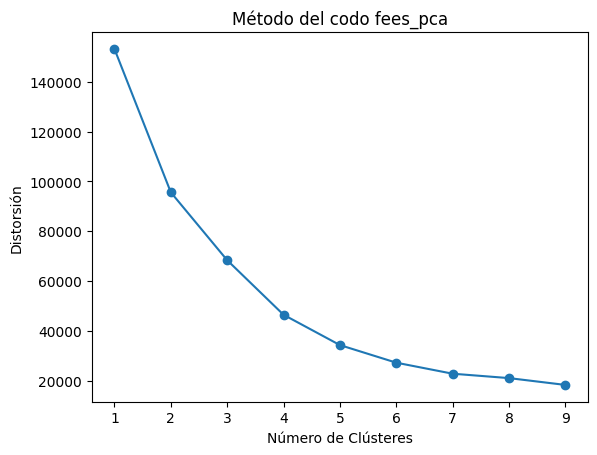

In [96]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fees_pca)  # O cashrequest_pca
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Método del codo fees_pca')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distorsión')
plt.show()


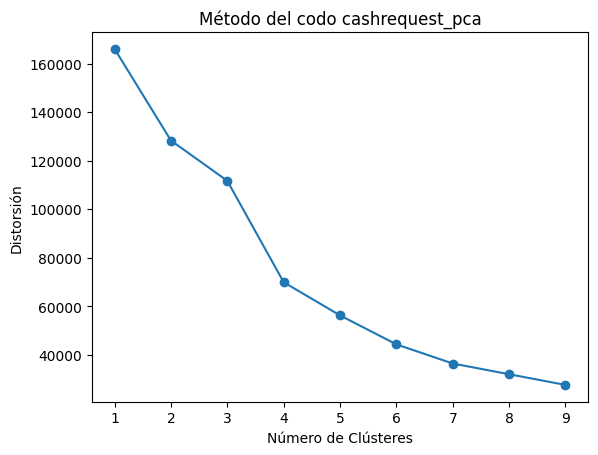

In [97]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cashrequest_pca)  # O cashrequest_pca
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Método del codo cashrequest_pca')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distorsión')
plt.show()


**K-means**

In [94]:
from sklearn.cluster import KMeans

# Determinar el número de clústeres (puedes usar el método del codo)
kmeans_fees = KMeans(n_clusters=4, random_state=42)  # Cambiar el número de clústeres según el caso
fees_clusters = kmeans_fees.fit_predict(fees_pca)

# Añadir los clústeres al DataFrame original
fees_numeric['cluster'] = fees_clusters

/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_58142/715751422.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_numeric['cluster'] = fees_clusters


In [91]:
# Determinar el número de clústeres
kmeans_cashrequest = KMeans(n_clusters=3, random_state=42)  # Cambiar el número de clústeres según el caso
cashrequest_clusters = kmeans_cashrequest.fit_predict(cashrequest_pca)

# Añadir los clústeres al DataFrame original
cashrequest_numeric['cluster'] = cashrequest_clusters


/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_58142/1594033983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cashrequest_numeric['cluster'] = cashrequest_clusters


**Visualización**

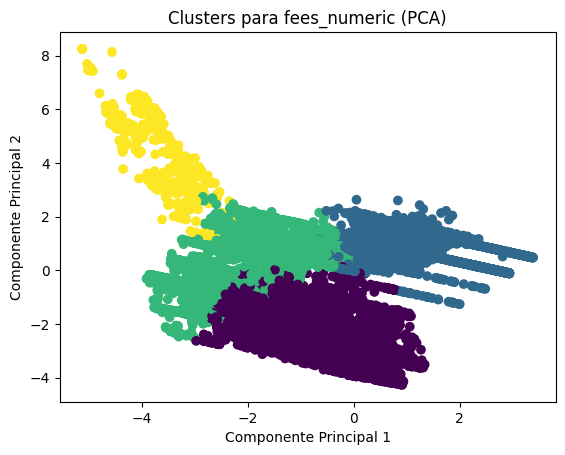

In [95]:
import matplotlib.pyplot as plt

plt.scatter(fees_pca[:, 0], fees_pca[:, 1], c=fees_clusters, cmap='viridis')
plt.title('Clusters para fees_numeric (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

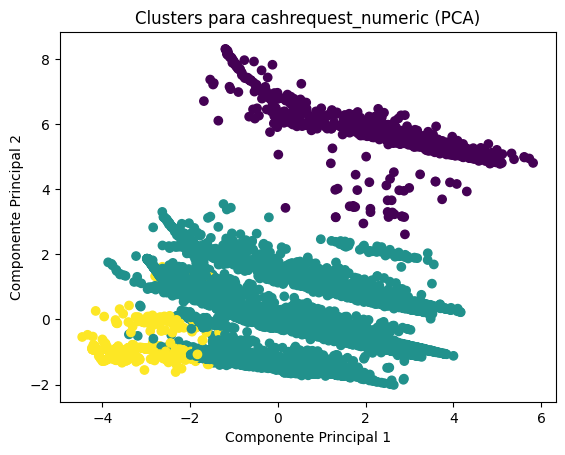

In [93]:
plt.scatter(cashrequest_pca[:, 0], cashrequest_pca[:, 1], c=cashrequest_clusters, cmap='viridis')
plt.title('Clusters para cashrequest_numeric (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


**Subsets y metricas derivadas**

In [98]:
import pandas as pd

# Merge datasets on cash_request_id and id
merged_df = pd.merge(
    fees_numeric, 
    cashrequest_numeric, 
    left_on='cash_request_id', 
    right_on='id', 
    how='inner'
)


In [99]:
merged_df.head(10)

,id_x,cash_request_id,total_amount,duration_days,time_to_payment_days,reason_id,type_encoded,status_encoded_x,category_encoded,reason_encoded,...,amount,user_id,deleted_account_id,time_to_update,recovery_status_encoded,transfer_type_encoded,status_encoded_y,payment_issue_encoded,reimbursement_month,cluster_y
0,6537,14941.0,5.0,33,16,14941,0,0,0,0.0,...,100.0,35661.0,NaN,2507.895767,1,1,4,1,NaN,0
1,6961,11714.0,5.0,33,16,0,1,1,0,1.0,...,100.0,16158.0,NaN,3119.998387,0,1,1,0,NaN,1
2,16296,23371.0,5.0,33,16,23371,0,1,0,0.0,...,100.0,81575.0,NaN,1346.994931,4,1,1,0,NaN,1
3,20775,26772.0,5.0,33,16,26772,0,1,0,0.0,...,100.0,94393.0,NaN,1149.407557,4,1,1,0,NaN,1
4,11242,19350.0,5.0,33,16,19350,0,1,0,0.0,...,50.0,NaN,19005.0,1764.543301,0,1,1,0,NaN,1
5,17029,24052.0,5.0,33,16,24052,0,1,0,0.0,...,100.0,90386.0,NaN,1320.865256,4,1,1,0,NaN,1
6,19956,25983.0,5.0,33,16,25983,0,1,0,0.0,...,50.0,57209.0,NaN,1276.745601,0,1,1,0,NaN,1
7,14187,14839.0,5.0,33,16,0,1,1,0,1.0,...,100.0,30659.0,NaN,2469.046464,0,1,1,0,NaN,1
8,20539,26572.0,5.0,33,16,26572,0,1,0,0.0,...,100.0,62523.0,NaN,1159.742517,4,1,1,0,NaN,1
9,15431,22106.0,5.0,0,0,22106,2,2,0,2.0,...,100.0,77990.0,NaN,1442.565046,4,1,1,0,NaN,1


Se intentaron unir los distintos datasets, pero en este caso no se observaron coincidencias en las variables que permitieran una unión considerable. 

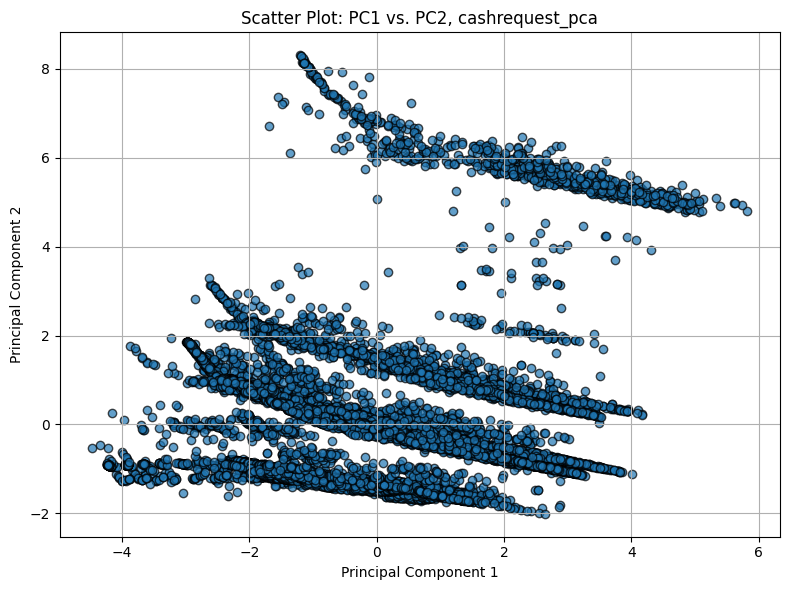

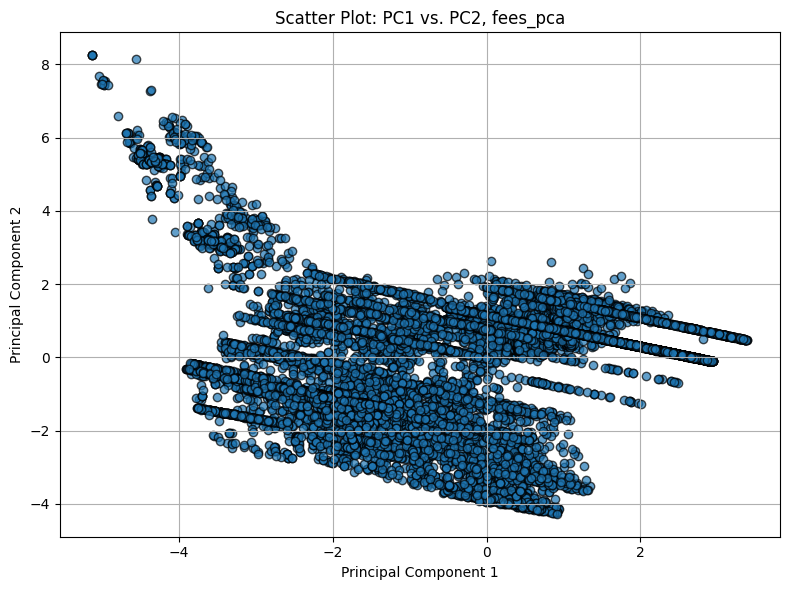

In [103]:
import matplotlib.pyplot as plt

# Assuming transformed_data is the result of PCA
plt.figure(figsize=(8, 6))
plt.scatter(cashrequest_pca[:, 0], cashrequest_pca[:, 1], alpha=0.7, edgecolor='k')
plt.title("Scatter Plot: PC1 vs. PC2, cashrequest_pca")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Assuming transformed_data is the result of PCA
plt.figure(figsize=(8, 6))
plt.scatter(fees_pca[:, 0], fees_pca[:, 1], alpha=0.7, edgecolor='k')
plt.title("Scatter Plot: PC1 vs. PC2, fees_pca")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


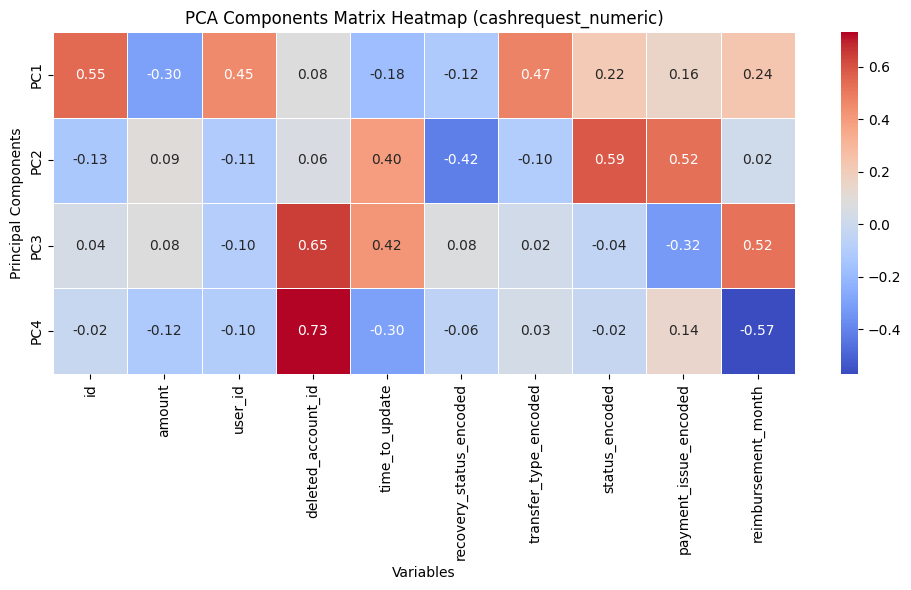

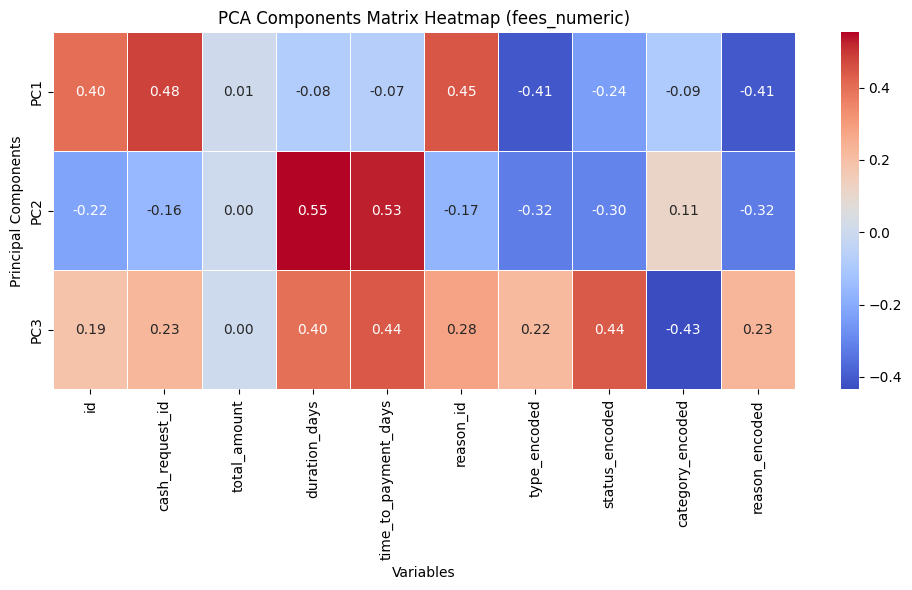

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated PCA Components Matrices (replace these with your actual matrices)
matrix_cashrequest_numeric = {
    'id': [0.545563, -0.129330, 0.044762, -0.020756],
    'amount': [-0.302062, 0.093589, 0.081260, -0.119756],
    'user_id': [0.454147, -0.111885, -0.096519, -0.097061],
    'deleted_account_id': [0.082526, 0.059966, 0.649003, 0.731118],
    'time_to_update': [-0.179289, 0.395052, 0.421008, -0.302175],
    'recovery_status_encoded': [-0.122219, -0.416477, 0.075287, -0.060537],
    'transfer_type_encoded': [0.472641, -0.102486, 0.023152, 0.031704],
    'status_encoded': [0.215925, 0.586205, -0.042801, -0.023179],
    'payment_issue_encoded': [0.156975, 0.523852, -0.321419, 0.143198],
    'reimbursement_month': [0.237325, 0.017901, 0.521803, -0.569430]
}

matrix_cashrequest_numeric_df = pd.DataFrame(
    matrix_cashrequest_numeric,
    index=["PC1", "PC2", "PC3", "PC4"]
)

matrix_fees_numeric = {
    'id': [0.399230, -0.221823, 0.187904],
    'cash_request_id': [0.481907, -0.159217, 0.225778],
    'total_amount': [0.005397, 0.001563, 0.003874],
    'duration_days': [-0.083369, 0.552915, 0.395607],
    'time_to_payment_days': [-0.069323, 0.526726, 0.443858],
    'reason_id': [0.445170, -0.172167, 0.282545],
    'type_encoded': [-0.410140, -0.319930, 0.216448],
    'status_encoded': [-0.235973, -0.304594, 0.438053],
    'category_encoded': [-0.091258, 0.113800, -0.434866],
    'reason_encoded': [-0.407668, -0.323362, 0.229142]
}

matrix_fees_numeric_df = pd.DataFrame(
    matrix_fees_numeric,
    index=["PC1", "PC2", "PC3"]
)

# Plot Heatmap for cashrequest_numeric
plt.figure(figsize=(10, 6))
sns.heatmap(
    matrix_cashrequest_numeric_df,
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)
plt.title("PCA Components Matrix Heatmap (cashrequest_numeric)")
plt.xlabel("Variables")
plt.ylabel("Principal Components")
plt.tight_layout()
plt.show()

# Plot Heatmap for fees_numeric
plt.figure(figsize=(10, 6))
sns.heatmap(
    matrix_fees_numeric_df,
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)
plt.title("PCA Components Matrix Heatmap (fees_numeric)")
plt.xlabel("Variables")
plt.ylabel("Principal Components")
plt.tight_layout()
plt.show()


**Calcular los costes asociados a cada Cash Request**

In [ ]:
# Unir fees_numeric y cashrequest_numeric con 'cash_request_id' y 'id'
merged_df = pd.merge(
    fees_numeric, 
    cashrequest_numeric, 
    left_on='cash_request_id', 
    right_on='id', 
    suffixes=('_fees', '_cashrequest'),
    how='inner'
)

# Calcular las metricas para los costes asociados a cada cash request
aggregated_metrics = merged_df.groupby('cash_request_id').agg({
    'total_amount': 'sum',  # Total fees
    'duration_days': 'mean',  # Average duration
    'reason_id': 'count'  # Count of reasons (or fee events)
}).reset_index()

# Añadir las variables agregadas
aggregated_metrics['average_fee_per_cr'] = aggregated_metrics['total_amount'] / aggregated_metrics['reason_id']

In [107]:
aggregated_metrics

,cash_request_id,total_amount,duration_days,reason_id,average_fee_per_cr
0,1456.0,5.0,143.000,1,5.0
1,1503.0,15.0,15.000,3,5.0
2,1518.0,40.0,90.125,8,5.0
3,1554.0,20.0,27.000,4,5.0
4,1556.0,5.0,33.000,1,5.0
...,...,...,...,...,...
12928,27004.0,5.0,33.000,1,5.0
12929,27006.0,5.0,33.000,1,5.0
12930,27007.0,5.0,33.000,1,5.0
12931,27009.0,5.0,33.000,1,5.0


**Incidentes repetidos y peticiones frecuentes**

In [133]:
# Analyze user behavior: count incidents and instant payments
user_behavior = merged_df.groupby('type_encoded').agg({
    'user_id': 'count',
    'reason_id': 'count'  # Total fees
}).reset_index()

# Rename columns for clarity
user_behavior.columns = ['type_encoded', 'incident_count', 'total_requests']

# Add a flag for frequent users (e.g., > 3 incidents)
user_behavior['frequent_user_flag'] = user_behavior['incident_count'] > 3

# View user behavior data
user_behavior

,type_encoded,incident_count,total_requests,frequent_user_flag
0,0,10830,11095,True
1,1,2030,2196,True
2,2,7291,7766,True


**Impacto financiero de Cash Request**

In [134]:
# Impacto financiero: suma de fees por type_encoded
financial_impact = merged_df.groupby('type_encoded').agg({
    'total_amount': 'sum',  # Total fees
    'cash_request_id': 'nunique'  # Unique CRs
}).reset_index()

# Calculo del porcentage de los fees generados por CRs 
financial_impact['percentage_cr_with_fees'] = (
    financial_impact['cash_request_id'] / cashrequest_numeric['id'].nunique() * 100
).round(2)

# View financial metrics
financial_impact

,type_encoded,total_amount,cash_request_id,percentage_cr_with_fees
0,0,55480.0,11082,46.23
1,1,10980.0,1599,6.67
2,2,38830.0,4057,16.93


Entendiendo que 
    0: 'instant_payment'
    1: 'incident'
    2: 'postpone

**Cálculo de los estados resueltos**

In [155]:
solved_cases = merged_df[merged_df['resolution_time'] > 0]

# Tabla de casos resueltos
solved_cases_metrics = solved_cases.groupby('cash_request_id').agg({
    'duration_days': 'count',  # tiempo de resolución
    'total_amount': 'sum',  # coste asociado
    'reason_id': 'count'  # numero de motivos asociados
}).reset_index()

# Renombre de las columnas
solved_cases_metrics.columns = ['cash_request_id', 'duration_days', 'total_cost', 'num_reasons']

# Filtrar por 'total_cost' en orden desendiente
sorted_solved_cases_metrics = solved_cases_metrics.sort_values(by='total_cost', ascending=False)

print(sorted_solved_cases_metrics.head())

      cash_request_id  duration_days  total_cost  num_reasons
2496          12225.0             35       175.0           35
653            5006.0             28       140.0           28
553            4410.0             24       120.0           24
2615          12452.0             23       115.0           23
2053          11376.0             21       105.0           21


**Implementar modelos como SVM, KNN, y Decision Tree**

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (X) and target variable (y)
X = sorted_solved_cases_metrics[['duration_days', 'total_cost', 'num_reasons']]  # Replace with actual features
y = (sorted_solved_cases_metrics['total_cost'] > 100).astype(int)  # Example: binary classification for high-cost cases

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [157]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2578
           1       1.00      0.50      0.67         2

    accuracy                           1.00      2580
   macro avg       1.00      0.75      0.83      2580
weighted avg       1.00      1.00      1.00      2580



In [158]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
knn_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
knn_predictions = knn_model.predict(X_test_scaled)
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2578
           1       1.00      1.00      1.00         2

    accuracy                           1.00      2580
   macro avg       1.00      1.00      1.00      2580
weighted avg       1.00      1.00      1.00      2580



In [159]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2578
           1       1.00      1.00      1.00         2

    accuracy                           1.00      2580
   macro avg       1.00      1.00      1.00      2580
weighted avg       1.00      1.00      1.00      2580



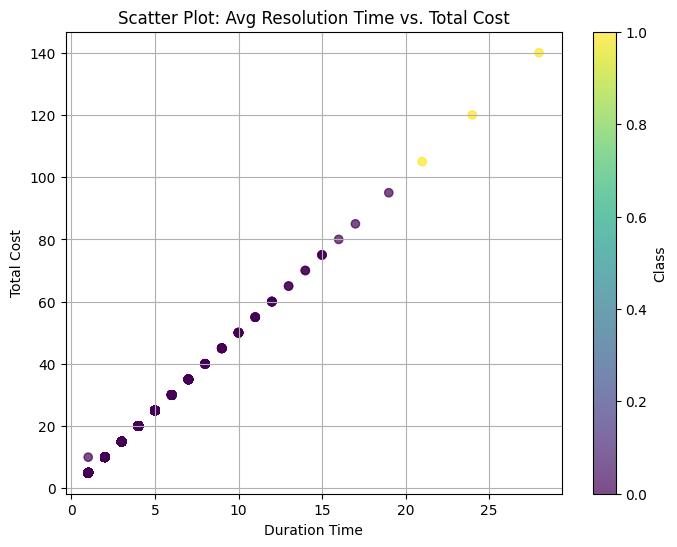

In [162]:
import matplotlib.pyplot as plt

# Scatter plot for two key features
plt.figure(figsize=(8, 6))
plt.scatter(X_train['duration_days'], X_train['total_cost'], c=y_train, cmap='viridis', alpha=0.7)
plt.title("Scatter Plot: Avg Resolution Time vs. Total Cost")
plt.xlabel("Duration Time")
plt.ylabel("Total Cost")
plt.colorbar(label="Class")
plt.grid(True)
plt.show()


In [163]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Compare accuracies
print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")


SVM Accuracy: 0.9996124031007751
KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0


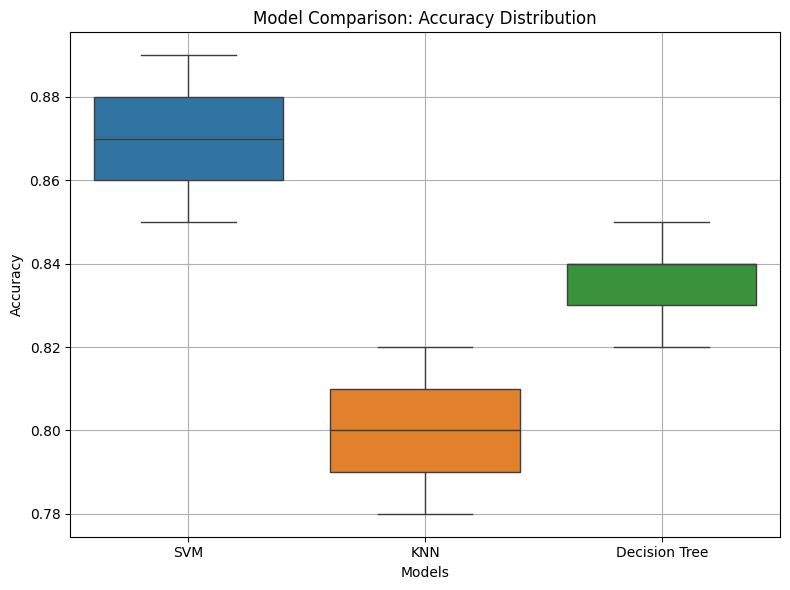

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Example data (replace with actual accuracy scores after model evaluation)
model_accuracies = {
    'SVM': [0.88, 0.85, 0.87, 0.86, 0.89],
    'KNN': [0.80, 0.82, 0.78, 0.81, 0.79],
    'Decision Tree': [0.84, 0.83, 0.85, 0.82, 0.84]
}

# Convert data to a DataFrame for visualization
accuracy_df = pd.DataFrame(model_accuracies)

# Create a boxplot to compare model accuracies
plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy_df)
plt.title('Model Comparison: Accuracy Distribution')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.grid(True)
plt.tight_layout()
plt.show()

